Group Name: AG 19.

Student Name (Student ID):
1. Anna Claudia Yenardi (A0156886J)
2. Lin Zhao (A0156962U)
3. Robin Mak Heng Mun (A0275676L)

Contributions of each group member in the report: Anna, Luke, and Robin collaborated effectively and contributed fairly on this assignment. They have also learnt a lot from each other during the assignment.

Below is the individual group member contributions:
1. Anna: Q1 - Approximating the function |x-1| using a neural network.
2. Luke: Q2 - Implementation of three-input MAJORITY gate. 
3. Robin: Q1 - Compare the loss using Adam optimizer. Q2 - Inspect the parameters of the model. Updated rationale with activation function explanation. 


# Assignment 3: Introduction to Neural Networks using PyTorch

It consists of three questions: Q1 and Q2 are mandatory. Q3 is for self-learning and submission of the solution for this question is optional. 

**Q1:** Approximating the function |x-1| using a neural network.

**Q2:** Implementation of three-input MAJORITY gate. The truth-table for this gate is provided in the problem statement.

**Q3:** (**optional**) Hand digit recognition using MLP. 
 

In [3]:
pip install torch torchvision

Note: you may need to restart the kernel to use updated packages.


In [1]:
# RUN THIS CELL FIRST
import math
import matplotlib.pyplot as plt
import torch
import torch.nn as nn



# Q1 Function Approximation [5 marks] 

Building deep learning networks manually is challenging. 

PyTorch abstracts that away using the `nn.Linear(in_dimensions, out_dimensions)` layer that does this under the hood.  
`Linear` represents a fully connected layer with bias automatically included.  
If you do not wish to include a bias column, you can simply call `nn.Linear(in_dimensions, out_dimensions, bias=False)` instead.

PyTorch has many other layers implemented for various model architectures.  
You can read more in the glossary as well as in the docs: https://pytorch.org/docs/stable/nn.html  
For now, we will only be using fully connected `Linear` layers.

We inherit from PyTorch's `nn.Module` class to build the model `y = |x-1|`.  


This should allow you to appreciate the ease in which we can build neural networks using PyTorch.  

The `nn.Module` class is an interface that houses two main methods: `__init__`, where we instantiate our layers and activation functions, and `forward`, that performs the forward pass.

### Q1.1 Forward pass [2 marks]

For this problem, NN architecture is given to you. Please refer the following figure.


<img src="./img_toy_nn.jpg" width="180">  


You need to implement the constructor method and `forward` method to simulate the above NN.

For this, you need to select the parameters for the model such as number of inputs, number of perceptrons in each hidden layer, activation function.

In [2]:
class Absolute(nn.Module):
    def __init__(self):
        super(Absolute, self).__init__()

        self.linear1 = nn.Linear(1, 3)
        self.linear2 = nn.Linear(3, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        linear1 = self.linear1(x)
        linear2 = self.linear2(self.relu(linear1))
        return linear2


### Q1.2 Backward propagation  [3 marks]

Instantitate the model, select the optimizer, loss function, and train the model 

Epoch	Loss	
-----	----
 1000	0.010083944536745548
 2000	0.004239289555698633
 3000	0.003452427452430129
 4000	0.0030587571673095226
 5000	0.0027462507132440805
 6000	0.0024786717258393764
 7000	0.0022436990402638912
 8000	0.0020333072170615196
 9000	0.0018425874877721071
10000	0.0016680463450029492


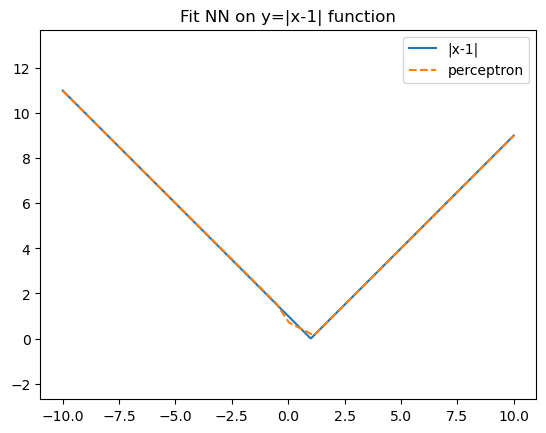

In [7]:
absolute_function = Absolute()
# Select the optimizer (uncomment the next line and fill right hand side)
optimiser = torch.optim.SGD(absolute_function.parameters(), lr=0.01)
#optimiser1 = torch.optim.Adam(absolute_function.parameters(), lr=0.01)

# Select the loss function (uncomment the next line and fill right hand side)                          
loss_fn = nn.MSELoss()

#Initialize list to store loss
loss_SGD = []
#loss_Adam = []

#Generation of training data
x = torch.linspace(-10, 10, 1000).reshape(-1, 1)
y = torch.abs(x-1)

#Training the model (uncomment the next line and fill right hand side)
epochs = 10000
print('Epoch', 'Loss', '\n-----', '----', sep='\t')
for i in range(1, epochs+1):
    # reset gradients to 0
    optimiser.zero_grad()

    # get predictions
    y_pred = absolute_function(x)
    
    # compute loss (uncomment the next line and fill right hand side)
    abs_loss = loss_fn(y_pred, y) 
    
     # store loss into list
    loss_SGD.append(abs_loss.item())

    # backpropagate
    abs_loss.backward()
    
    # update the model weights
    optimiser.step()

    if i % 1000 == 0:
        print (f"{i:5d}", abs_loss.item(), sep='\t')

y_pred = absolute_function(x)
plt.plot(x, y, linestyle='solid', label='|x-1|')
plt.plot(x, y_pred.detach().numpy(), linestyle='dashed', label='perceptron')
plt.axis('equal')
plt.title('Fit NN on y=|x-1| function')
plt.legend()
plt.show()


#visualize how the loss decreases in both SGD and Adam optimizers 
#plt.plot(loss_SGD,label = "Stochastic Gradient Descent")
#plt.plot(loss_Adam,label = "Adam Optimizer")
#plt.xlabel('epoch')
#plt.ylabel('Cost/ total loss')
#plt.legend()
#plt.show()


### Q2 Modeling of MAJORITY gate using a minimalist neural network [5 marks]

The objective is to model the three-input MAJORITY gate  using a neural network. 

As the name implies, the output is majority of the inputs. 
    
    If the number of 1s in the input are greater than number of 0s, then output is 1. Otherwise, output is 0.
    
Truth table of the three-input MAJORITY gate is provided below. 

```
| x1 | x2 | x3| y|
|---------|---|--|
| 0  | 0  | 0 | 0| 
| 0  | 0  | 1 | 0|
| 0  | 1  | 0 | 0|
| 0  | 1  | 1 | 1|
| 1  | 0  | 0 | 0| 
| 1  | 0  | 1 | 1|
| 1  | 1  | 0 | 1|
| 1  | 1  | 1 | 1|

```

Unlike Q1, we did not provide network architecture. You should use least possible number of neurons and layers for this problem

**Hint:** Check if you can skip hidden layers? If you cannot avoid hidden layer, select least number of neuron(s) in the hidden layer(s) that mininizes the prediction error. Explain the rationale behind the inclusion/exclusion of hidden layer(s).

The Majority Gate, despite being a non-linear function, has a relatively simple decision boundary. The logic can be expressed with a linear decision boundary in the input space. A single perceptron is capable of learning simple linear decision boundaries, and in this case, it might be sufficient to represent the logic. 

Sigmoid function is used as the activation function to predict the probability as an output. Since probability of anything exists only between the range of 0 and 1, sigmoid is the preferred activation function for this model than tanh as it has a non zero-centered output between 0 and 1, while tanh is preferred in hidden layers. 

Adding a hidden layer introduces more parameters and complexity to the model. For a task as simple as the Majority Gate, additional complexity might not necessarily improve performance and could even lead to overfitting or unnecessary model capacity.

Thus, in the below code, we did not use any hidden layers and instead, we used a single perceptron to model the Majority Gate.

Q2.1 Forward Pass [2 marks]

In [8]:
#Objective is to model the majority gate with LEAST POSSIBLE number of perceptrons/neurons and layers
class MajorityGate(nn.Module):
    def __init__(self):
        super(MajorityGate, self).__init__()
        self.fc = nn.Linear(3, 1) # Single perceptron replacing the hidden layer

    def forward(self, x):
        x = torch.sigmoid(self.fc(x))
        return x

In [9]:
#Inspect the parameters of the model 
model = MajorityGate()
list(model.named_parameters())

[('fc.weight',
  Parameter containing:
  tensor([[-0.0219, -0.1775,  0.0420]], requires_grad=True)),
 ('fc.bias',
  Parameter containing:
  tensor([-0.1442], requires_grad=True))]

### Q2.2 Backward Propagation [3 marks]

In [10]:
majority_gate = MajorityGate()
# Select the optimizer (uncomment the next line and fill right hand side)
optimizer = torch.optim.SGD(majority_gate.parameters(), lr=0.01)         

# Select the loss function (uncomment the next line and fill right hand side)                          

loss_fn = nn.MSELoss()


#Generation of training data (uncomment the next line and fill right hand side)
x = torch.tensor([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
], dtype=torch.float32)

y = torch.tensor([
    [0],
    [0],
    [0],
    [1],
    [0],
    [1],
    [1],
    [1]
], dtype=torch.float32)


#Training the model 
#uncomment the next line and fill right hand side
epochs = 10000
print('Epoch', 'Loss', '\n-----', '----', sep='\t')
for i in range(1, epochs+1):
    
    # reset gradients to 0
    optimizer.zero_grad()

    # get predictions
    outputs = majority_gate(x)
    
    
    # compute loss (uncomment the next line and fill right hand side)
    loss = loss_fn(outputs, y)

    # backpropagate 
    loss.backward()
    
    # update the model weights
    optimizer.step()

    if i % 1000 == 0:
        print (f"{i:5d}", loss.item(), sep='\t')

y_pred = majority_gate(x)
#Output of the neural network
print(y_pred.round())   

Epoch	Loss	
-----	----
 1000	0.21924304962158203
 2000	0.17748835682868958
 3000	0.1482132226228714
 4000	0.1274838000535965
 5000	0.11220373958349228
 6000	0.10043960064649582
 7000	0.09103735536336899
 8000	0.08329630643129349
 9000	0.07677458971738815
10000	0.0711812898516655
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.]], grad_fn=<RoundBackward0>)


### Q3  [Optinal] Using NN to recognize handwritten digits [0 marks] (only for self practice; no need to submit the solution to this question)


In the final part of this problem set, we will be building a neural network to classify images to their respective digits.  

You will build and train a model on the classic **MNIST Handwritten Digits** dataset. Each grayscale image is a $28 \times 28$ matrix/tensor that looks like so:

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" width="500" />

MNIST is a classification problem and the task is to take in an input image and classify them into one of ten buckets: the digits from $0$ to $9$. 

### Loading an external dataset

The cell below imports the MNIST dataset, which is already pre-split into train and test sets.  

The download takes approximately 63MB of space.

In [ ]:
# DO NOT REMOVE THIS CELL – THIS DOWNLOADS THE MNIST DATASET
# RUN THIS CELL BEFORE YOU RUN THE REST OF THE CELLS BELOW
#Install torchvision
from torchvision import datasets

# This downloads the MNIST datasets ~63MB
mnist_train = datasets.MNIST("./", train=True, download=True)
mnist_test  = datasets.MNIST("./", train=False, download=True)

x_train = mnist_train.data.reshape(-1, 784) / 255
y_train = mnist_train.targets
    
x_test = mnist_test.data.reshape(-1, 784) / 255
y_test = mnist_test.targets

### 3.1 - Define the model architechure and implement the forward pass
Create a 3-layer network in the `__init__` method of the model `DigitNet`.  
These layers are all `Linear` layers and should correspond to the following the architecture:

<img src="img_linear_nn.png" width="600">

In our data, a given image $x$ has been flattened from a 28x28 image to a 784-length array.

After initializing the layers, stitch them together in the `forward` method. Your network should look like so:

$$x \rightarrow \text{Linear(512)} \rightarrow \text{ReLU} \rightarrow \text{Linear(128)} \rightarrow \text{ReLU} \rightarrow \text{Linear(10)} \rightarrow \text{Softmax} \rightarrow \hat{y}$$

**Softmax Layer**: The final softmax activation is commonly used for classification tasks, as it will normalizes the results into a vector of values that follows a probability distribution whose total sums up to 1. The output values are between the range [0,1] which is nice because we are able to avoid binary classification and accommodate as many classes or dimensions in our neural network model.

*Note: When using `torch.softmax(...)` on the final layer, ensure you are applying it on the correct dimension (as you did in NumPy via the `axis` argument in popular methods)*

In [ ]:
class DigitNet(nn.Module):
    def __init__(self, input_dimensions, num_classes): # set the arguments you'd need
        super().__init__()
        """
        YOUR CODE HERE
        
        - your network should work for any input and output size 
            – add appropriate arguments in the object constructor
        - create the 3 layers (and a ReLU layer) using the torch.nn layers API
        """
        raise NotImplementedError
        
    def forward(self, x):
        """
        Performs the forward pass for the network.
        
        PARAMS:
            x : the input tensor (batch size is the entire dataset)
            
        RETURNS
            the output of the entire 3-layer model
        """
        
        """
        YOUR CODE
        
        - pass the inputs through the sequence of layers
        - run the final output through the Softmax function on the right dimension!
        """
        raise NotImplementedError

### Q3.2 Training Loop

As demonstrated in Section 3.2, implement the function `train_model` that performs the following for every epoch/iteration:

1. set the optimizer's gradients to zero
2. forward pass
3. calculate the loss
4. backpropagate using the loss
5. take an optimzer step to update weights

This time, use the Adam optimiser to train the network.  
Use Cross-Entropy Loss, since we are performing a classification.  
Train for 20 epochs.  

*Note: refer to the command glossary to find out how to instantiate optimisers, losses, and more*

In [ ]:
def train_model(x_train, y_train, epochs=20):
    """
    Trains the model for 20 epochs/iterations
    
    PARAMS:
        x_train : a tensor of training features of shape (60000, 784)
        y_train : a tensor of training labels of shape (60000, 1)
        epochs  : number of epochs, default of 20
        
    RETURNS:
        the final model 
    """
    model = DigitNet(784, 10)
    optimiser = ... # use Adam
    loss_fn = ...   # use cross-entropy loss

    for i in range(epochs):
        raise NotImplementedError

    return model
                
digit_model = train_model(x_train, y_train)

### Q3.3 - Explore your model

Now that we have trained the model, let us run some predictions on the model.

In [ ]:
# This is a demonstration: You can use this cell for exploring your trained model

idx = 0 # try on some index

scores = digit_model(x_test[idx:idx+1])
_, predictions = torch.max(scores, 1)
print("true label:", y_test[idx].item())
print("pred label:", predictions[0].item())

plt.imshow(x_test[idx].numpy().reshape(28, 28), cmap='gray')
plt.axis("off")
plt.show()

### Q3.4 - Evaluate the model

Now that we have trained the model, we should evaluate it using our test set.  
We will be using the accuracy (whether or not the model predicted the correct label) to measure the model performance.  

Since our model takes in a (n x 784) tensor and returns a (n x 10) tensor of probability scores for each of the 10 classes, we need to convert the probability scores into the actual predictions by taking the index of the maximum probability.  

In [ ]:
def get_accuracy(scores, labels):
    """
    helper function that returns accuracy of model (out of 100%)
    PARAMS:
        scores : the raw softmax scores of the network
        label : the ground truth labels
        
    RETURNS:
        accuracy out of 100%
    """
    raise NotImplementedError

scores = digit_model(x_test) # n x 10 tensor
get_accuracy(scores, y_test)